In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Kyphosis Disease Classification.ipynb to Kyphosis Disease Classification (1).ipynb


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kyphosis.csv to kyphosis (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [ ]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
#view statistical detail
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
#summary the data frame
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


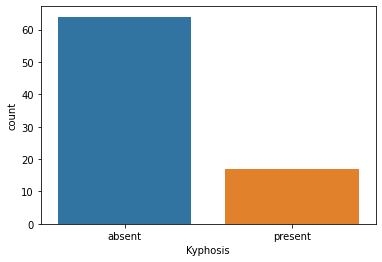

In [ ]:
#visualize dataset
sns.countplot(kyphosis_df['Kyphosis'], label = 'Count')

In [ ]:
# data preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [ ]:
#instance on object out of our class
LabelEncoder_y = LabelEncoder() 

In [ ]:
#replace kyphosis columns
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [ ]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [ ]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


In [ ]:
# Absent - no kyphosis after operation
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']== 0]

In [ ]:
kyphosis_False.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [ ]:
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(kyphosis_df)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [ ]:
# Disease kyphosis Present after the operation
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']== 1]

In [ ]:
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [ ]:
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(kyphosis_df)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


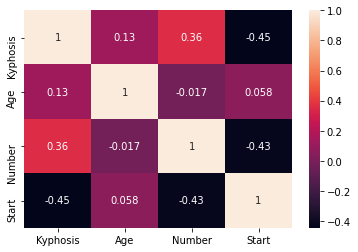

In [ ]:
# Correlation 
sns.heatmap(kyphosis_df.corr(), annot = True)

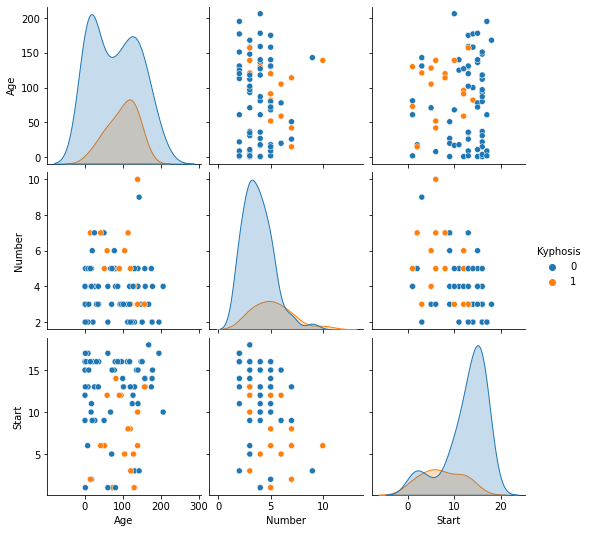

In [ ]:
# Visualize 
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

In [ ]:
# (Kyphosis) target class/output and 3 inputs (Age Number and Start)
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

In [ ]:
# Inputs to the Machine learning algorithm
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [ ]:
y = kyphosis_df['Kyphosis']

In [ ]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [ ]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# 56 samples/data point for training
X_train.shape

(56, 3)

In [ ]:
y_train.shape

(56,)

In [ ]:
# 25 samples for testing
X_test.shape

(25, 3)

In [ ]:
y_test.shape

(25,)

In [ ]:
# Train a decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Plot the Confusion Matrix for the testing dataset  
y_predict_test = decision_tree.predict(X_test)

In [ ]:
y_predict_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0])

In [ ]:
y_test

29    0
59    0
74    0
41    0
76    1
19    0
10    1
3     0
16    0
75    0
78    0
39    1
28    0
42    0
53    0
65    0
67    0
26    0
37    1
40    1
36    0
43    0
60    1
12    0
63    0
Name: Kyphosis, dtype: int64

In [ ]:
cm = confusion_matrix(y_test, y_predict_test)

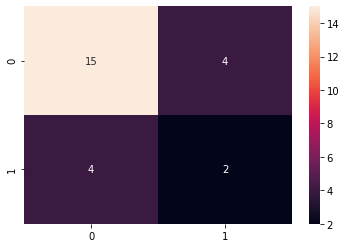

In [ ]:
# Misclassified 3 and 4 samples. Correctly classified 18 samples (16 class 0 and 2 class 1)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



In [ ]:
# Random Forest classifier to improve the model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)

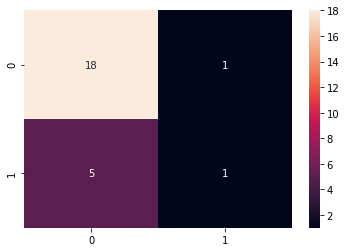

In [ ]:
#creating confusion matrix for test prediction
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        19
           1       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25

